In [16]:
# Libraries for manage the file in os and in the gdrive.
from google.colab import drive
import os

# Libraries for do computational things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [15]:
#unzip to local env
!unzip -u "/content/gdrive/MyDrive/Dataset/Cats and Dogs Breeds Classification Oxford Dataset.zip" -d "/content/Dataset"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/Dataset/images/images/Sphynx_9.jpg  
  inflating: /content/Dataset/images/images/Sphynx_90.jpg  
  inflating: /content/Dataset/images/images/Sphynx_91.jpg  
  inflating: /content/Dataset/images/images/Sphynx_92.jpg  
  inflating: /content/Dataset/images/images/Sphynx_93.jpg  
  inflating: /content/Dataset/images/images/Sphynx_94.jpg  
  inflating: /content/Dataset/images/images/Sphynx_95.jpg  
  inflating: /content/Dataset/images/images/Sphynx_96.jpg  
  inflating: /content/Dataset/images/images/Sphynx_98.jpg  
  inflating: /content/Dataset/images/images/Sphynx_99.jpg  
  inflating: /content/Dataset/images/images/american_bulldog_10.jpg  
  inflating: /content/Dataset/images/images/american_bulldog_100.jpg  
  inflating: /content/Dataset/images/images/american_bulldog_101.jpg  
  inflating: /content/Dataset/images/images/american_bulldog_102.jpg  
  inflating: /content/Dataset/images/images/american_bulldo

In [17]:
#all_path = '/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt'
test_path = '/content/Dataset/annotations/annotations/test.txt'
train_path = '/content/Dataset/annotations/annotations/trainval.txt'

In [18]:
#all_df = pd.read_csv(train_path, sep=' ', skiprows=range(0, 6), names=['img', 'id', 'species', 'breed_id'])
test_df = pd.read_csv(test_path, sep=' ', skiprows=None, names=['img', 'id', 'species', 'breed_id'])
train_df = pd.read_csv(train_path, sep=' ', skiprows=None, names=['img', 'id', 'species', 'breed_id'])

In [19]:
# setting some variables
ROOT = '/content/Dataset'
IMGS_PATH = '/content/Dataset/images/images'

# set with names of the files that do not open correctly
bad = {'Abyssinian_34.jpg', 'Egyptian_Mau_145.jpg', 'Egyptian_Mau_139.jpg', 'Egyptian_Mau_191.jpg', 'Egyptian_Mau_177.jpg', 'Egyptian_Mau_167.jpg'}

# list with 'good' file names without the extension
all_imgs = [i for i in os.listdir(IMGS_PATH) if i.rsplit('.',1)[1] == 'jpg' and i not in bad]

# some general information
print('We have ' + str(len(all_imgs)) + ' good imgages.')
print('(for some unknown reason, there are ' + str(len(bad)) + ' that do not want to open)')

We have 7384 good imgages.
(for some reason, there are 6 that do not want to open)


In [22]:
# getting info from 'list.txt' file
l = open(ROOT + '/annotations/annotations/list.txt', 'r')

# lambda functions to get breed and species from the annotations
get_breed = lambda pic : pic.rsplit('_',1)[0].lower()
get_species = lambda num : 'cat' if num==1 else 'dog'

# dictionaries where data will be stored
info_by_id = {}
info_by_breed = {}

# loop through every line in the 'list.txt' file
for line in l:
  
  # if it has an '#' in the begining then we are to ignore it
  if line[0] == '#':
    continue
  
  # we create a list with the info in the row
  line = line.strip().split(' ')
  
  # we get the species information, the id, the breed id and the name from the file for each row
  species = get_species(int(line[2]))
  id = int(line[1])
  breedid = int(line[3])
  name = get_breed(line[0]).lower()
  
  # then we store this information in the dictionaries
  # 2 dictionaries are used in order to make the accessing the information easier!
  if name not in info_by_breed:
    info_by_breed[name] = {'breed' : name, 'species' : species, 'globalid': id, 'breedid':breedid, 'count':0}
    info_by_id[id] = info_by_breed[name]

# now we can count the number of examples for each breed
for p in [get_breed(n) for n in all_imgs]:
  info_by_breed[p]['count']+=1

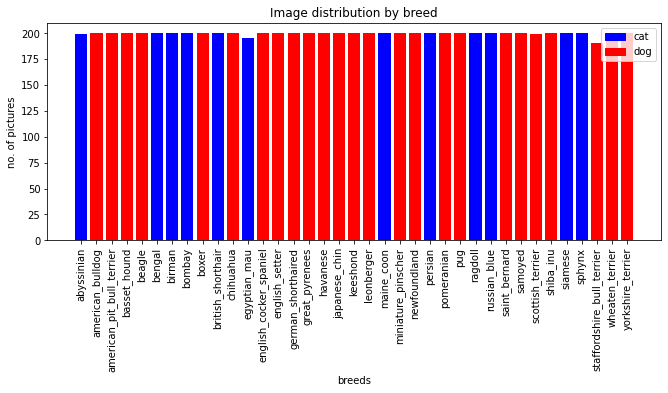

There are 2394 images of cats, and 4990 of dogs!


In [23]:
# getting all the breed ids from the dictionaries
ids = list(info_by_id.keys())

# creating a list with all the Y values (number of examples per breed) ordered by id
counts = [info_by_id[id]['count'] for id in ids]

# creating a list of the names of the breeds ordered by id
x_labels = [info_by_id[i]['breed'] for i in ids]

# setting the bar colour depending on whether it is a cat or a dog
colours = [ 'blue' if info_by_id[id]['species']=='cat' else 'red' for id in ids]

# preparing labels and legend
colours_leg = {'cat': 'blue', 'dog':'red'}
labels = list(colours_leg.keys())
handles = [plt.Rectangle((0,0),1,1, color=colours_leg[label]) for label in colours_leg]

# plotting
fig, ax = plt.subplots( figsize= (11,4))
ax.bar(ids, counts, color=colours)

# set ticks and axis labels and legend:
ax.set_xticks(ids)
ax.set_xticklabels(x_labels, rotation='vertical')
plt.legend(handles, labels)
plt.xlabel('breeds')
plt.ylabel('no. of pictures')
plt.title('Image distribution by breed')
plt.show()

# determining numbers of examples of cats and dogs
nr_cats = sum([ info_by_id[id]['count'] for id in ids if info_by_id[id]['species'] == 'cat' ])
nr_dogs = sum([ info_by_id[id]['count'] for id in ids if info_by_id[id]['species'] == 'dog' ])
print('There are ' + str(nr_cats) + ' images of cats, and ' + str(nr_dogs) + ' of dogs!')